# Exploratory Data Analysis 
# Brief Review of projects.csv

In [1]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master('local').appName('Data cleaning').getOrCreate()

projects = spark.read.csv('C:/data/projects.csv', header=True, inferSchema=True)
projects.createOrReplaceTempView("projects")
projects.printSchema()

root
 |-- projectid: string (nullable = true)
 |-- teacher_acctid: string (nullable = true)
 |-- schoolid: string (nullable = true)
 |-- school_ncesid: double (nullable = true)
 |-- school_latitude: double (nullable = true)
 |-- school_longitude: double (nullable = true)
 |-- school_city: string (nullable = true)
 |-- school_state: string (nullable = true)
 |-- school_zip: double (nullable = true)
 |-- school_metro: string (nullable = true)
 |-- school_district: string (nullable = true)
 |-- school_county: string (nullable = true)
 |-- school_charter: string (nullable = true)
 |-- school_magnet: string (nullable = true)
 |-- school_year_round: string (nullable = true)
 |-- school_nlns: string (nullable = true)
 |-- school_kipp: string (nullable = true)
 |-- school_charter_ready_promise: string (nullable = true)
 |-- teacher_prefix: string (nullable = true)
 |-- teacher_teach_for_america: string (nullable = true)
 |-- teacher_ny_teaching_fellow: string (nullable = true)
 |-- primary_foc

In [2]:
spark.sql("""SELECT projectid, school_city, school_nlns, primary_focus_subject, poverty_level, date_posted 
             FROM projects LIMIT 10""").show()

+--------------------+-----------+-----------+---------------------+---------------+-------------------+
|           projectid|school_city|school_nlns|primary_focus_subject|  poverty_level|        date_posted|
+--------------------+-----------+-----------+---------------------+---------------+-------------------+
|316ed8fb3b81402ff...|      Selma|          f| Literature & Writing|highest poverty|2014-05-12 00:00:00|
|90de744e368a7e488...|     Dallas|          f|             Literacy|highest poverty|2014-05-12 00:00:00|
|32943bb1063267de6...|     Colton|          f|             Literacy|   high poverty|2014-05-11 00:00:00|
|bb18f409abda2f264...|   Brooklyn|          f|      Social Sciences|highest poverty|2014-05-11 00:00:00|
|24761b686e18e5eac...|Los Angeles|          f|          Mathematics|highest poverty|2014-05-11 00:00:00|
|eac7d156205f1333d...|   Chandler|          f| Literature & Writing|highest poverty|2014-05-11 00:00:00|
|5a3bfdf2e05781ccd...|  Lafayette|          f|        G

# Check Duplicates in projects.csv

In [3]:
print('number of rows: {0}'.format(projects.count()))
print('number of unique rows: {0}'.format(projects.distinct().count()))

number of rows: 664098
number of unique rows: 664098


In [4]:
print('number of projectid: {0}'.format(projects.select('projectid').count()))
print('number of unique projectid: {0}'.format(projects.select('projectid').distinct().count()))

number of projectid: 664098
number of unique projectid: 664098


# Brief Reviw of outcomes.csv

In [5]:
outcomes = spark.read.csv('C:/data/outcomes.csv', header=True)
outcomes.printSchema()
outcomes.createOrReplaceTempView("outcomes")

root
 |-- projectid: string (nullable = true)
 |-- is_exciting: string (nullable = true)
 |-- at_least_1_teacher_referred_donor: string (nullable = true)
 |-- fully_funded: string (nullable = true)
 |-- at_least_1_green_donation: string (nullable = true)
 |-- great_chat: string (nullable = true)
 |-- three_or_more_non_teacher_referred_donors: string (nullable = true)
 |-- one_non_teacher_referred_donor_giving_100_plus: string (nullable = true)
 |-- donation_from_thoughtful_donor: string (nullable = true)
 |-- great_messages_proportion: string (nullable = true)
 |-- teacher_referred_count: string (nullable = true)
 |-- non_teacher_referred_count: string (nullable = true)



In [6]:
spark.sql("""SELECT projectid, is_exciting, great_chat, great_messages_proportion,teacher_referred_count 
             FROM outcomes LIMIT 10""").show()

+--------------------+-----------+----------+-------------------------+----------------------+
|           projectid|is_exciting|great_chat|great_messages_proportion|teacher_referred_count|
+--------------------+-----------+----------+-------------------------+----------------------+
|ffffc4f85b60efc5b...|          f|         f|                     null|                  null|
|ffffac55ee02a49d1...|          f|         f|                     57.0|                   0.0|
|ffff97ed93720407d...|          f|         t|                    100.0|                   0.0|
|ffff418bb42fad243...|          f|         t|                    100.0|                   0.0|
|ffff2d9c769c8fb53...|          t|         t|                     63.0|                   6.0|
|fffeebf4827d745aa...|          f|         f|                      0.0|                   0.0|
|fffee68353ade53e7...|          f|         f|                      0.0|                   0.0|
|fffec078a2249c236...|          f|         f|     

# Check Duplicates in outcomes.csv

In [7]:
print('number of rows: {0}'.format(outcomes.count()))
print('number of unique rows: {0}'.format(outcomes.distinct().count()))

number of rows: 619326
number of unique rows: 619326


In [8]:
print('number of projectid: {0}'.format(outcomes.select('projectid').count()))
print('number of unique projectid: {0}'.format(outcomes.select('projectid').distinct().count()))

number of projectid: 619326
number of unique projectid: 619326


# Brief Review of essays.csv

In [9]:
essays = spark.read.csv('C:/data/essays.csv', header=True)
essays.printSchema()
essays.createOrReplaceTempView("essays")

root
 |-- projectid: string (nullable = true)
 |-- teacher_acctid: string (nullable = true)
 |-- title: string (nullable = true)
 |-- short_description: string (nullable = true)
 |-- need_statement: string (nullable = true)
 |-- essay: string (nullable = true)



In [10]:
spark.sql("""SELECt projectid, title, short_description, essay 
             FROM essays LIMIT 10""").show()

+--------------------+--------------------+--------------------+--------------------+
|           projectid|               title|   short_description|               essay|
+--------------------+--------------------+--------------------+--------------------+
|ffffc4f85b60efc5b...|               iMath|It is imperative ...|I am a fourth yea...|
|                  \n|                null|                null|                null|
|\nI would like to...|     create podcasts|     listen to tests| with other class...|
|                  \n|                null|                null|                null|
|\nStudents contin...| including using ...|       manipulatives| I work in a Titl...|
|                  \n|                null|                null|                null|
|\nIt is imperativ...| “students learn ...|                null|                null|
|ffffac55ee02a49d1...|Recording Rockin'...|Can you imagine h...|Can you imagine h...|
|                  \n|                null|           

# Check Duplicates in essays.csv

In [11]:
print('number of rows: {0}'.format(essays.count()))
print('number of unique rows: {0}'.format(essays.distinct().count()))

number of rows: 5399190
number of unique rows: 2941600


In [12]:
print('number of projectid: {0}'.format(essays.select('projectid').count()))
print('number of unique projectid: {0}'.format(essays.select('projectid').distinct().count()))

number of projectid: 5399190
number of unique projectid: 2688834


# Merge Three Datasets

In [13]:
data = spark.sql("""SELECT p.*, 
                    o.is_exciting, o.at_least_1_teacher_referred_donor, o.fully_funded,
                    o.at_least_1_green_donation, o.great_chat, o.three_or_more_non_teacher_referred_donors,
                    o.one_non_teacher_referred_donor_giving_100_plus, o.donation_from_thoughtful_donor,
                    o.great_messages_proportion, o.teacher_referred_count, o.non_teacher_referred_count, 
                    e.title, e.short_description, e.need_statement, e.essay
                    FROM projects p
                    INNER JOIN outcomes o ON p.projectid = o.projectid
                    INNER JOIN essays e ON p.projectid = e.projectid
                    WHERE p.date_posted > '2010-04-01' AND p.date_posted < '2014-01-01' """)

data.createOrReplaceTempView("data")
data = data.drop('date_posted')
data.count()

422848

# Check Duplicates in merged datasets

In [14]:
print('number of rows: {0}'.format(data.count()))
print('number of unique rows: {0}'.format(data.distinct().count()))

number of rows: 422848
number of unique rows: 422848


In [15]:
print('number of projectid: {0}'.format(data.select('projectid').count()))
print('number of unique projectid: {0}'.format(data.select('projectid').distinct().count()))

number of projectid: 422848
number of unique projectid: 422848


# Check Missing Values

In [16]:
import pyspark.sql.functions as fn
missing = data.agg(*[
    (1 - (fn.count(c) / fn.count('*'))).alias(c + '__missing ')
    for c in data.columns
])
missing_list = missing.collect()
str(missing_list).split(',')

['[Row(projectid__missing =0.0',
 ' teacher_acctid__missing =0.0',
 ' schoolid__missing =0.0',
 ' school_ncesid__missing =0.06892074693506889',
 ' school_latitude__missing =0.0',
 ' school_longitude__missing =0.0',
 ' school_city__missing =0.0',
 ' school_state__missing =0.0',
 ' school_zip__missing =7.094747994540462e-06',
 ' school_metro__missing =0.12326888148932946',
 ' school_district__missing =0.0011422544271227908',
 ' school_county__missing =0.0',
 ' school_charter__missing =0.0',
 ' school_magnet__missing =0.0',
 ' school_year_round__missing =0.0',
 ' school_nlns__missing =0.0',
 ' school_kipp__missing =0.0',
 ' school_charter_ready_promise__missing =0.0',
 ' teacher_prefix__missing =0.0',
 ' teacher_teach_for_america__missing =0.0',
 ' teacher_ny_teaching_fellow__missing =0.0',
 ' primary_focus_subject__missing =8.277205993645342e-05',
 ' primary_focus_area__missing =8.277205993645342e-05',
 ' secondary_focus_subject__missing =0.3267557136370516',
 ' secondary_focus_area__mis

# Exploratory Data Analysis
# Visualization
I cheated a little bit by converting pySpark DF to pandas DF and utilize python matplotlib package to generate plots, because the plot tools are not well-established in pySpark (at least to me it is difficult to find references).

# Imbalanced Dataset
As we can see the number of exciting (successful) projcts is s small fraction in total number of projects proposed by school teachers.

In [17]:
temp1 = spark.sql("""SELECt is_exciting,
                     SUM(CASE WHEN is_exciting = 't' THEN 1 ELSE 0 END) AS num_exciting, 
                     SUM(CASE WHEN is_exciting = 'f' THEN 1 ELSE 0 END) AS num_non_exciting
                     FROM data 
                     GROUP BY is_exciting""")

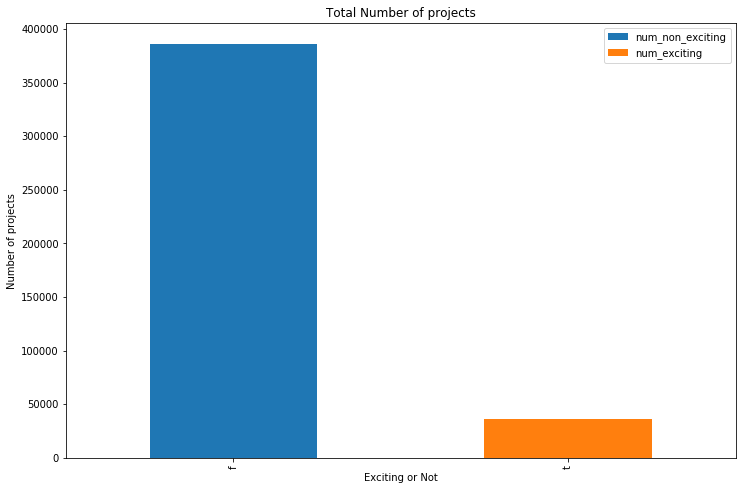

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

temp11 = temp1.toPandas()
x_labels = temp11.is_exciting
fig = temp11[['num_non_exciting', 'num_exciting']].plot(kind='bar', figsize=(12, 8), stacked=True)
fig.set_xticklabels(x_labels)
fig.set_title('Total Number of projects')
fig.set_xlabel('Exciting or Not')
fig.set_ylabel('Number of projects')
plt.show()

Next, we would like to see the distribution of exciting and non-exciting projects separated by school state. Interestingly, we found that the projects proposed in CA outperformed all other states during 2010 and 2014.

In [19]:
temp3 = spark.sql("""SELECt school_state,
                     SUM(CASE WHEN is_exciting = 't' THEN 1 ELSE 0 END) AS num_exciting, 
                     SUM(CASE WHEN is_exciting = 'f' THEN 1 ELSE 0 END) AS num_non_exciting
                     FROM data 
                     GROUP BY school_state """)
temp3.show()

+------------+------------+----------------+
|school_state|num_exciting|num_non_exciting|
+------------+------------+----------------+
|          SC|         642|            8136|
|          AZ|         756|            6579|
|          LA|         641|            6348|
|          MN|         381|            2910|
|          NJ|         546|            5539|
|          DC|         600|            2635|
|          OR|         469|            3924|
|          VA|         770|            5868|
|          RI|         170|            1207|
|          KY|         222|            3090|
|          WY|          13|             318|
|          NH|          98|             995|
|          MI|         846|            7090|
|          NV|         323|            5811|
|          WI|         483|            4273|
|          ID|         107|            1203|
|          CA|        7023|           85140|
|          CT|         458|            4203|
|          NE|          85|            1114|
|         

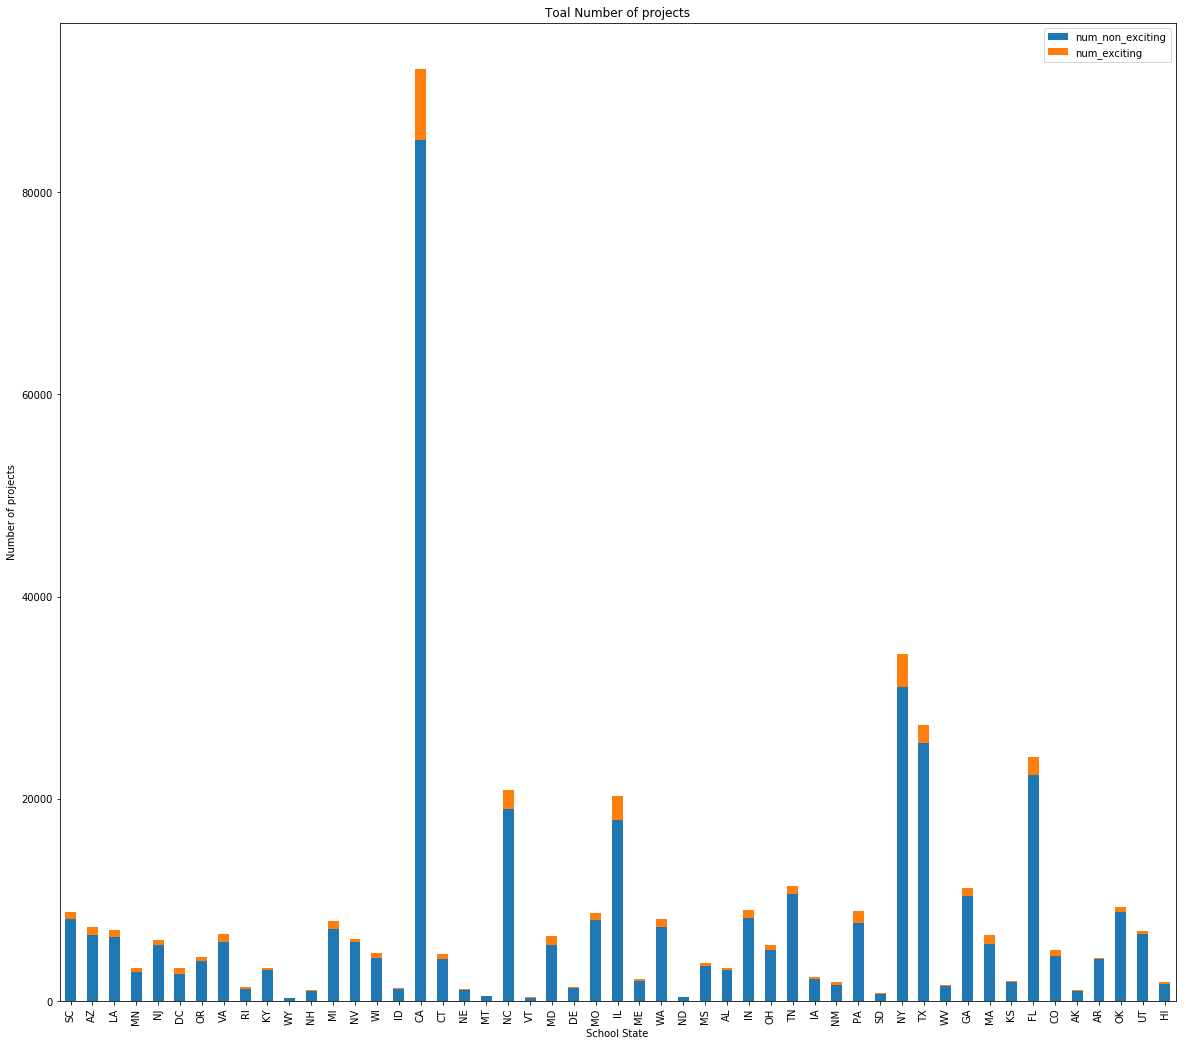

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

temp33 = temp3.toPandas()
x_labels = temp33.school_state
fig = temp33[['num_non_exciting', 'num_exciting']].plot(kind='bar', figsize=(20, 18), stacked=True)
fig.set_xticklabels(x_labels)
fig.set_title('Toal Number of projects')
fig.set_xlabel('School State')
fig.set_ylabel('Number of projects')
plt.show()